In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df = df.drop('customerID',axis='columns')

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [9]:
df.iloc[485:490,:].TotalCharges

485    6130.85
486       1415
487    6201.95
488           
489      74.35
Name: TotalCharges, dtype: object

In [10]:
# replace all non-numeric values with NaN

pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [11]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [12]:
df.shape

(7043, 20)

In [13]:
df = df.drop(df[df.TotalCharges==" "].index)

In [14]:
df.shape

(7032, 20)

In [15]:
pd.to_numeric(df.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [16]:
tenure_no = df[df.Churn=='No'].tenure
tenure_yes = df[df.Churn=='Yes'].tenure

Text(0.5, 1.0, 'Customer Churn Prediction Visualiztion')

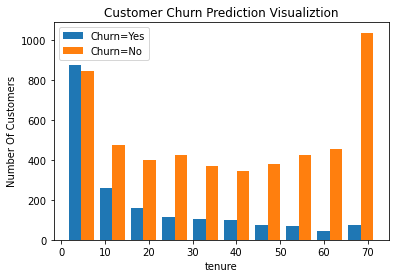

In [17]:
plt.hist([tenure_yes, tenure_no], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

In [18]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [19]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [20]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [21]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [22]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [23]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [24]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [25]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [27]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [28]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [30]:
X_train.shape

(5625, 26)

In [31]:
X_test.shape

(1407, 26)

In [32]:
len(X_train.columns)

26

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 896us/step - loss: 0.5162 - accuracy: 0.7392
Epoch 2/100
176/176 [==============================] - 0s 798us/step - loss: 0.4401 - accuracy: 0.7799
Epoch 3/100
176/176 [==============================] - 0s 801us/step - loss: 0.4339 - accuracy: 0.7884
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.7909
Epoch 5/100
176/176 [==============================] - 0s 952us/step - loss: 0.4262 - accuracy: 0.7947
Epoch 6/100
176/176 [==============================] - 0s 778us/step - loss: 0.4240 - accuracy: 0.7980
Epoch 7/100
176/176 [==============================] - 0s 757us/step - loss: 0.4220 - accuracy: 0.7982
Epoch 8/100
176/176 [==============================] - 0s 744us/step - loss: 0.4207 - accuracy: 0.7993
Epoch 9/100
176/176 [==============================] - 0s 729us/step - loss: 0.4197 - accuracy: 0.8012
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss:

176/176 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8217
Epoch 81/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8208
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8219
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8220
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8220
Epoch 85/100
176/176 [==============================] - 0s 838us/step - loss: 0.3682 - accuracy: 0.8206
Epoch 86/100
176/176 [==============================] - 0s 803us/step - loss: 0.3696 - accuracy: 0.8249
Epoch 87/100
176/176 [==============================] - 0s 805us/step - loss: 0.3684 - accuracy: 0.8204
Epoch 88/100
176/176 [==============================] - 0s 836us/step - loss: 0.3668 - accuracy: 0.8197
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3661 - ac

In [36]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 668us/step - loss: 0.4475 - accuracy: 0.8095


[0.44753026962280273, 0.8095238208770752]

In [37]:
y_prediction = model.predict(X_test)

In [38]:
y_pred = []
for element in y_prediction:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1059
           1       0.62      0.59      0.61       348

    accuracy                           0.81      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.81      0.81      0.81      1407



Text(69.0, 0.5, 'Truth')

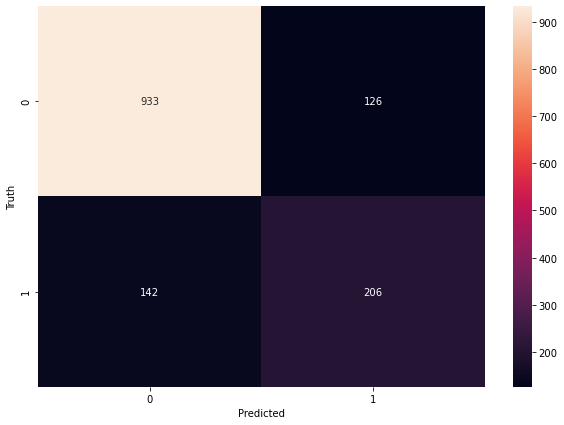

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
accuracy = round((934+170)/(934+170+106+197),2)

In [42]:
accuracy

0.78

## Handling Imbalanced Dataset 

In [43]:
tenure_no.shape

(5163,)

In [44]:
tenure_yes.shape

(1869,)

In [45]:
X = df.drop('Churn',axis='columns')
y = testLabels = df.Churn.astype(np.float32)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [47]:
#pip install tensorflow_addons

In [48]:
from tensorflow_addons import losses

In [49]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [50]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [51]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 782us/step - loss: 0.4805 - accuracy: 0.7691
Epoch 2/100
176/176 [==============================] - 0s 812us/step - loss: 0.4315 - accuracy: 0.7948
Epoch 3/100
176/176 [==============================] - 0s 820us/step - loss: 0.4242 - accuracy: 0.7998
Epoch 4/100
176/176 [==============================] - 0s 819us/step - loss: 0.4206 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 838us/step - loss: 0.4189 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 0s 831us/step - loss: 0.4173 - accuracy: 0.8084
Epoch 7/100
176/176 [==============================] - 0s 844us/step - loss: 0.4154 - accuracy: 0.8096
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8060
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8094
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8228
Epoch 81/100
176/176 [==============================] - 0s 946us/step - loss: 0.3745 - accuracy: 0.8242
Epoch 82/100
176/176 [==============================] - 0s 938us/step - loss: 0.3741 - accuracy: 0.8215
Epoch 83/100
176/176 [==============================] - 0s 886us/step - loss: 0.3733 - accuracy: 0.8226
Epoch 84/100
176/176 [==============================] - 0s 892us/step - loss: 0.3732 - accuracy: 0.8238
Epoch 85/100
176/176 [==============================] - 0s 952us/step - loss: 0.3725 - accuracy: 0.8263
Epoch 86/100
176/176 [==============================] - 0s 916us/step - loss: 0.3730 - accuracy: 0.8240
Epoch 87/100
176/176 [==============================] - 0s 930us/step - loss: 0.3725 - accuracy: 0.8226
Epoch 88/100
176/176 [==============================] - 0s 922us/step - loss: 0.3709 - accuracy: 0.8263
Epoch 89/100
176/176 [==============================] - 0s 945us/step - loss: 0

## Method 1: Undersampling

In [53]:
# Class count
count_class_0, count_class_1 = df.Churn.value_counts()

# Divide by class
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [54]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [55]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [56]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [57]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [58]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [59]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 901us/step - loss: 0.6022 - accuracy: 0.6890
Epoch 2/100
94/94 [==============================] - 0s 996us/step - loss: 0.5115 - accuracy: 0.7585
Epoch 3/100
94/94 [==============================] - 0s 835us/step - loss: 0.4939 - accuracy: 0.7669
Epoch 4/100
94/94 [==============================] - 0s 820us/step - loss: 0.4847 - accuracy: 0.7709
Epoch 5/100
94/94 [==============================] - 0s 850us/step - loss: 0.4798 - accuracy: 0.7702
Epoch 6/100
94/94 [==============================] - 0s 795us/step - loss: 0.4762 - accuracy: 0.7712
Epoch 7/100
94/94 [==============================] - 0s 832us/step - loss: 0.4763 - accuracy: 0.7753
Epoch 8/100
94/94 [==============================] - 0s 836us/step - loss: 0.4724 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 0s 866us/step - loss: 0.4727 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 853us/step - loss: 0.4698 - accura

94/94 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8087
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8114
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8130
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8134
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8094
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8134
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8171
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8120
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8127
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8171
Epoch 92/100


## Method2: Oversampling

In [60]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [61]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [62]:
# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [63]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 792us/step - loss: 0.5349 - accuracy: 0.7412
Epoch 2/100
259/259 [==============================] - 0s 788us/step - loss: 0.4875 - accuracy: 0.7637
Epoch 3/100
259/259 [==============================] - 0s 801us/step - loss: 0.4788 - accuracy: 0.7697
Epoch 4/100
259/259 [==============================] - 0s 826us/step - loss: 0.4746 - accuracy: 0.7706
Epoch 5/100
259/259 [==============================] - 0s 853us/step - loss: 0.4695 - accuracy: 0.7728
Epoch 6/100
259/259 [==============================] - 0s 883us/step - loss: 0.4675 - accuracy: 0.7749
Epoch 7/100
259/259 [==============================] - 0s 844us/step - loss: 0.4633 - accuracy: 0.7741
Epoch 8/100
259/259 [==============================] - 0s 918us/step - loss: 0.4597 - accuracy: 0.7787
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.7782
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss:

259/259 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8327
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8305
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3764 - accuracy: 0.8327
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8326
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8320
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8375
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8349
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8341
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8337
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 

## Method3: SMOTE (Synthetic Minority Oversampling TEchnique)

In [64]:
#pip install imbalanced-learn

In [65]:
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [66]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [68]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=2, stratify=y_sm)

In [70]:
# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [71]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 801us/step - loss: 0.5462 - accuracy: 0.7255
Epoch 2/100
259/259 [==============================] - 0s 798us/step - loss: 0.4694 - accuracy: 0.7794
Epoch 3/100
259/259 [==============================] - 0s 801us/step - loss: 0.4592 - accuracy: 0.7846
Epoch 4/100
259/259 [==============================] - 0s 773us/step - loss: 0.4519 - accuracy: 0.7868
Epoch 5/100
259/259 [==============================] - 0s 769us/step - loss: 0.4454 - accuracy: 0.7930
Epoch 6/100
259/259 [==============================] - 0s 763us/step - loss: 0.4410 - accuracy: 0.7943
Epoch 7/100
259/259 [==============================] - 0s 756us/step - loss: 0.4375 - accuracy: 0.7956
Epoch 8/100
259/259 [==============================] - 0s 750us/step - loss: 0.4311 - accuracy: 0.8008
Epoch 9/100
259/259 [==============================] - 0s 755us/step - loss: 0.4275 - accuracy: 0.8002
Epoch 10/100
259/259 [==============================] - 0s 865us/step - l

259/259 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 0.8496
Epoch 81/100
259/259 [==============================] - 0s 895us/step - loss: 0.3419 - accuracy: 0.8506
Epoch 82/100
259/259 [==============================] - 0s 951us/step - loss: 0.3425 - accuracy: 0.8499
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8544
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8513
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8513
Epoch 86/100
259/259 [==============================] - 0s 953us/step - loss: 0.3383 - accuracy: 0.8521
Epoch 87/100
259/259 [==============================] - 0s 972us/step - loss: 0.3391 - accuracy: 0.8523
Epoch 88/100
259/259 [==============================] - 0s 996us/step - loss: 0.3401 - accuracy: 0.8530
Epoch 89/100
259/259 [==============================] - 0s 910us/step - loss: 0.3368 

## Method4: Use of Ensemble with undersampling

In [72]:
# Regain Original features and labels
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [74]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [75]:
4130/1495

2.762541806020067

### Approximately 3 subgroups

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)


In [76]:
df_ens = X_train.copy()
df_ens['Churn'] = y_train

In [77]:
df_ens_class0 = df_ens[df_ens.Churn==0]
df_ens_class1 = df_ens[df_ens.Churn==1]

In [78]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [79]:
X_train, y_train = get_train_batch(df_ens_class0, df_ens_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 891us/step - loss: 0.6208 - accuracy: 0.6478
Epoch 2/100
94/94 [==============================] - 0s 928us/step - loss: 0.5246 - accuracy: 0.7492
Epoch 3/100
94/94 [==============================] - 0s 887us/step - loss: 0.5080 - accuracy: 0.7559
Epoch 4/100
94/94 [==============================] - 0s 881us/step - loss: 0.5015 - accuracy: 0.7555
Epoch 5/100
94/94 [==============================] - 0s 949us/step - loss: 0.4958 - accuracy: 0.7589
Epoch 6/100
94/94 [==============================] - 0s 990us/step - loss: 0.4935 - accuracy: 0.7629
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.7656
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7666
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.76

94/94 [==============================] - 0s 791us/step - loss: 0.3983 - accuracy: 0.8184
Epoch 82/100
94/94 [==============================] - 0s 754us/step - loss: 0.3983 - accuracy: 0.8151
Epoch 83/100
94/94 [==============================] - 0s 759us/step - loss: 0.3983 - accuracy: 0.8197
Epoch 84/100
94/94 [==============================] - 0s 715us/step - loss: 0.3923 - accuracy: 0.8241
Epoch 85/100
94/94 [==============================] - 0s 704us/step - loss: 0.3943 - accuracy: 0.8204
Epoch 86/100
94/94 [==============================] - 0s 726us/step - loss: 0.3912 - accuracy: 0.8177
Epoch 87/100
94/94 [==============================] - 0s 792us/step - loss: 0.3941 - accuracy: 0.8207
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8221
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8234
Epoch 90/100
94/94 [==============================] - 0s 971us/step - loss: 0.3891 - accuracy: 0.82

In [81]:
X_train, y_train = get_train_batch(df_ens_class0, df_ens_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 881us/step - loss: 0.6084 - accuracy: 0.6863
Epoch 2/100
94/94 [==============================] - 0s 884us/step - loss: 0.5303 - accuracy: 0.7421
Epoch 3/100
94/94 [==============================] - 0s 887us/step - loss: 0.5140 - accuracy: 0.7468
Epoch 4/100
94/94 [==============================] - 0s 880us/step - loss: 0.5074 - accuracy: 0.7482
Epoch 5/100
94/94 [==============================] - 0s 865us/step - loss: 0.5049 - accuracy: 0.7508
Epoch 6/100
94/94 [==============================] - 0s 813us/step - loss: 0.5009 - accuracy: 0.7542
Epoch 7/100
94/94 [==============================] - 0s 827us/step - loss: 0.4984 - accuracy: 0.7548
Epoch 8/100
94/94 [==============================] - 0s 854us/step - loss: 0.4962 - accuracy: 0.7562
Epoch 9/100
94/94 [==============================] - 0s 808us/step - loss: 0.4934 - accuracy: 0.7569
Epoch 10/100
94/94 [==============================] - 0s 863us/step - loss: 0.4915 - accura

94/94 [==============================] - 0s 828us/step - loss: 0.4166 - accuracy: 0.8090
Epoch 82/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8043
Epoch 83/100
94/94 [==============================] - 0s 984us/step - loss: 0.4145 - accuracy: 0.8064
Epoch 84/100
94/94 [==============================] - 0s 881us/step - loss: 0.4138 - accuracy: 0.8080
Epoch 85/100
94/94 [==============================] - 0s 846us/step - loss: 0.4135 - accuracy: 0.8097
Epoch 86/100
94/94 [==============================] - 0s 793us/step - loss: 0.4126 - accuracy: 0.8084
Epoch 87/100
94/94 [==============================] - 0s 760us/step - loss: 0.4114 - accuracy: 0.8110
Epoch 88/100
94/94 [==============================] - 0s 763us/step - loss: 0.4133 - accuracy: 0.8077
Epoch 89/100
94/94 [==============================] - 0s 766us/step - loss: 0.4147 - accuracy: 0.8057
Epoch 90/100
94/94 [==============================] - 0s 763us/step - loss: 0.4104 - accuracy: 0.

In [82]:
X_train, y_train = get_train_batch(df_ens_class0, df_ens_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 879us/step - loss: 0.6650 - accuracy: 0.6076
Epoch 2/100
83/83 [==============================] - 0s 887us/step - loss: 0.5208 - accuracy: 0.7575
Epoch 3/100
83/83 [==============================] - 0s 907us/step - loss: 0.4867 - accuracy: 0.7643
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.7681
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7674
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7738
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7723
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7704
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7704
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7738
Epo

83/83 [==============================] - 0s 743us/step - loss: 0.3866 - accuracy: 0.8258
Epoch 82/100
83/83 [==============================] - 0s 824us/step - loss: 0.3846 - accuracy: 0.8288
Epoch 83/100
83/83 [==============================] - 0s 840us/step - loss: 0.3873 - accuracy: 0.8277
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8262
Epoch 85/100
83/83 [==============================] - 0s 848us/step - loss: 0.3838 - accuracy: 0.8266
Epoch 86/100
83/83 [==============================] - 0s 796us/step - loss: 0.3831 - accuracy: 0.8315
Epoch 87/100
83/83 [==============================] - 0s 722us/step - loss: 0.3821 - accuracy: 0.8254
Epoch 88/100
83/83 [==============================] - 0s 754us/step - loss: 0.3822 - accuracy: 0.8311
Epoch 89/100
83/83 [==============================] - 0s 729us/step - loss: 0.3819 - accuracy: 0.8315
Epoch 90/100
83/83 [==============================] - 0s 736us/step - loss: 0.3818 - accuracy: 0.

In [83]:
len(y_pred1)

1407

In [84]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [85]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1033
           1       0.49      0.85      0.62       374

    accuracy                           0.72      1407
   macro avg       0.71      0.76      0.70      1407
weighted avg       0.81      0.72      0.74      1407

